# 엔트로피(entropy)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy

np.random.seed(102)

샘플을 생성합니다. 평균이 20인 포아송 분포를 따르는 샘플 200개를 생성합니다

[21 17 21 15 18 20 15 25 20 14 21 21 16 21 20 20 25 20 18 21]


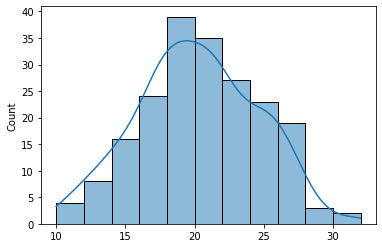

In [2]:
sample = np.random.poisson(20, 200)
print(sample[:20])

sns.histplot(sample, kde=True)
plt.show()

위 샘플이 나타내는 엔트로피를 구합니다.
1. 숫자별 확률을 계산합니다.
2. 엔트로피를 계산합니다.

숫자별 확률을 계산합니다.

In [3]:
from collections import Counter

In [4]:
prop = Counter(sample)
prop = {i[0]:i[1]/200 for i in prop.items()}
prop = dict(sorted(prop.items()))
print(prop)

{10: 0.005, 11: 0.015, 12: 0.025, 13: 0.015, 14: 0.05, 15: 0.03, 16: 0.05, 17: 0.07, 18: 0.105, 19: 0.09, 20: 0.07, 21: 0.105, 22: 0.08, 23: 0.055, 24: 0.03, 25: 0.085, 26: 0.04, 27: 0.055, 28: 0.01, 29: 0.005, 31: 0.005, 32: 0.005}


엔트로피를 계산합니다.

H =  sum(- p * log(p))

In [5]:
p = list(prop.values())

In [6]:
# Method 1
h = sum(map(lambda x: -x*math.log(x) if x!=0 else 0, p))

# Method 2
'''h = 0.0
for i in prop.values():
    try:
        h += -i*np.log(i)#math.log(i)
    except:
        pass'''

print(h)

2.801899930840769


`scipy` 모듈의 entropy 계산 함수와 동일한 결과가 나옵니다. 

In [7]:
from scipy import stats

In [8]:
# scipy.stats.entropy에는 확률 값이 아닌 count 값을 넣어줘야합니다.
prop = Counter(sample) 
stats.entropy(list(prop.values()))

2.801899930840769

### 다른 분포의 엔트로피

1. uniform 분포 : 확률이 비슷한 경우에는 엔트로피가 높게 계산됩니다.

[27  2 22 30 33  7 11 31  2 10 25 33 14 27  4  4 12 11 28 20]


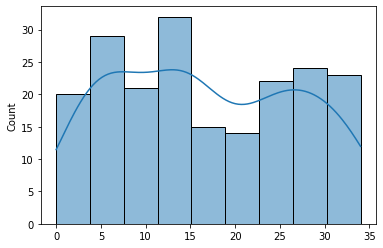

In [9]:
sample = np.random.randint(0, 35, 200)
print(sample[:20])

sns.histplot(sample, kde=True)
plt.show()

In [10]:
prop = Counter(sample) 
stats.entropy(list(prop.values()))

3.483499247564642

2. skew normal 분포

In [11]:
from scipy import stats

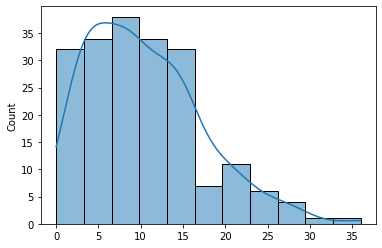

In [15]:
sample = stats.skewnorm.rvs(10, size=200)
sample = 35* ((abs(min(sample))+sample) / max(sample)) # scaling
sample = np.array(sample, dtype='int')

sns.histplot(sample, kde=True)
plt.show()

In [16]:
prop = Counter(sample) 
stats.entropy(list(prop.values()))

3.105029195376043

### 참고

아래는 `scipy.stats.entropy`의 계산 함수입니다.

* `entr: x의 값에 따라 다른 값을 반환하는 함수 [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.entr.html)

In [14]:
def entropy(pk, qk=None, base=None, axis=0):
    """Calculate the entropy of a distribution for given probability values.
    If only probabilities `pk` are given, the entropy is calculated as
    ``S = -sum(pk * log(pk), axis=axis)``.
    If `qk` is not None, then compute the Kullback-Leibler divergence
    ``S = sum(pk * log(pk / qk), axis=axis)``.
    This routine will normalize `pk` and `qk` if they don't sum to 1.
    Parameters
    ----------
    pk : sequence
        Defines the (discrete) distribution. ``pk[i]`` is the (possibly
        unnormalized) probability of event ``i``.
    qk : sequence, optional
        Sequence against which the relative entropy is computed. Should be in
        the same format as `pk`.
    base : float, optional
        The logarithmic base to use, defaults to ``e`` (natural logarithm).
    axis: int, optional
        The axis along which the entropy is calculated. Default is 0.
    Returns
    -------
    S : float
        The calculated entropy.
    Examples
    --------
    >>> from scipy.stats import entropy
    Bernoulli trial with different p.
    The outcome of a fair coin is the most uncertain:
    >>> entropy([1/2, 1/2], base=2)
    1.0
    The outcome of a biased coin is less uncertain:
    >>> entropy([9/10, 1/10], base=2)
    0.46899559358928117
    Relative entropy:
    >>> entropy([1/2, 1/2], qk=[9/10, 1/10])
    0.5108256237659907
    """
    pk = asarray(pk)
    pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
    if qk is None:
        vec = entr(pk)
    else:
        qk = asarray(qk)
        if qk.shape != pk.shape:
            raise ValueError("qk and pk must have same shape.")
        qk = 1.0*qk / np.sum(qk, axis=axis, keepdims=True)
        vec = rel_entr(pk, qk)
    S = np.sum(vec, axis=axis)
    if base is not None:
        S /= log(base)
    return S